# Probabilistic Spike Generation  

In the Indepedent spike hypothesis, the generation of each spike is a random process driven by an underlying continuous signal r(t) and independent of all other spikes. And the resulting spike train is a subsequence of poission proces.  

To construct a realistic probabilistic model of spike trains we use various window functions here.

## Generation of poisson spikes

In the below code, I first generate the poisson spike trains.

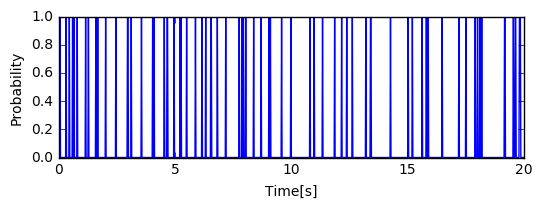

In [126]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

dt = 0.02
time = 20
size = time*int(1/dt)

def generate_spikes(size, prob, counts):
    B = np.random.poisson(prob, size)
    
    for i in range(size):
        B = [float(a < prob) for a in B]
    return B

spikes = generate_spikes(size, 0.08, 30)
time_space = np.linspace(0, time, size)

plt.subplot(211)
plt.plot(time_space, spikes)
plt.xlabel('Time[s]')
plt.ylabel('Probability')
plt.show()

## From spikes to firing rate

Here, we compute the instantaneous firing rate for each spike events and assumed that value as firing frequency of the neuron.

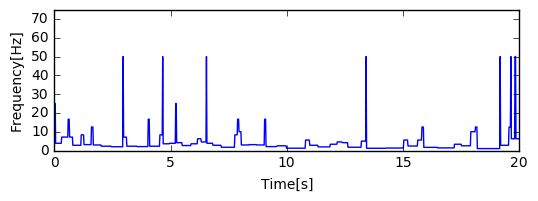

In [127]:
def calculate_frequency(spike_data):
    spike_size = len(spike_data)
    spike_index = np.nonzero(spike_data)[0]
    index_size = len(spike_index)
    frequencies = np.zeros(spike_size)
    
    for i in range(index_size-1):
        current_time = spike_index[i]
        next_time = spike_index[i+1]
        frequencies[current_time:next_time] = (1.0/(next_time-current_time))*(1.0/dt)    
    frequencies[spike_index[index_size-1]:spike_size] = (1.0/(spike_size-spike_index[index_size-1]))*(1.0/dt)
    return frequencies

frequencies = calculate_frequency(spikes)

plt.subplot(211)
plt.plot(time_space, frequencies)
plt.xlabel('Time[s]')
plt.ylabel('Frequency[Hz]')
plt.ylim([0, 1.5*(1/dt)])
plt.show()

## Square window to firing rate

We applied the square window to calculate the firing rate of the neuron.  
Here we can see the discontinuities between timings.

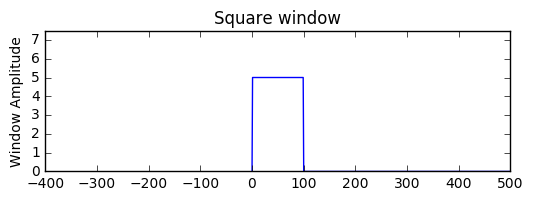

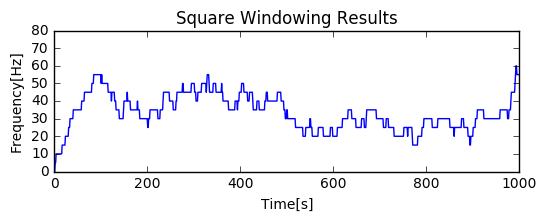

In [128]:
amplitude = 5
window_size = int(size/10)
square_window = np.zeros(size)
square_window[1:int(size/10)] = amplitude
square_result = np.convolve(spikes, square_window)
square_result = square_result[0:1000]

plt.subplot(211)
plt.title("Square window")
plt.plot(square_window)
plt.xlim([-400, 500])
plt.ylim([0, 1.5*amplitude])
plt.ylabel('Window Amplitude')
plt.show()
plt.subplot(211)
plt.title("Square Windowing Results")
plt.ylim([0, 80])
plt.xlabel('Time[s]')
plt.ylabel('Frequency[Hz]')
plt.plot(square_result)
plt.show()

## Gaussian window to firing rate

To remove the discontinuities in firing rate, I applied the gasussian window to the spike trains.

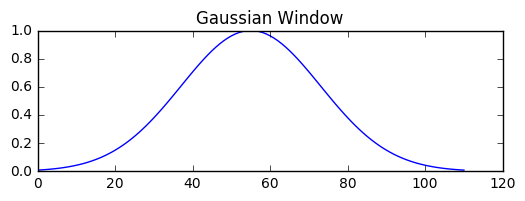

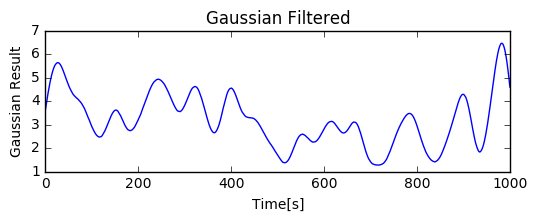

In [148]:
sd = 18
g_size = int(size/9)

gaussian_window = signal.gaussian(g_size, std=sd)
gaussian_result = np.convolve(spikes, gaussian_window)
gaussian_result = gaussian_result[int(g_size/2):size+int(g_size/2)]

plt.subplot(211)
plt.title("Gaussian Window")
plt.plot(gaussian_window)
plt.show()
plt.subplot(211)
plt.title("Gaussian Filtered")
plt.xlabel('Time[s]')
plt.ylabel('Gaussian Result')
plt.plot(gaussian_result)
plt.show()

## Comparing the results

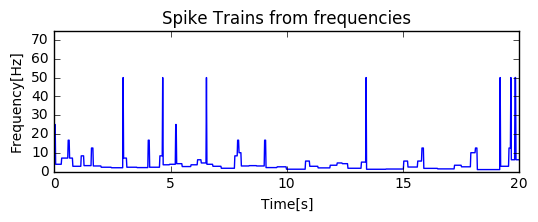

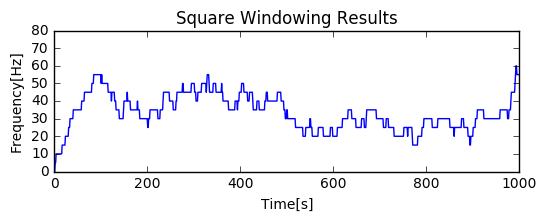

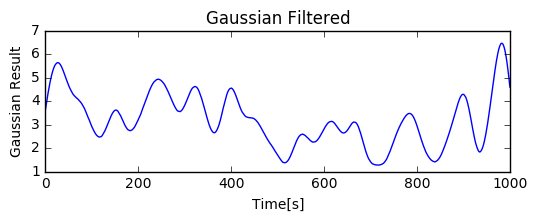

In [150]:
plt.subplot(211)
plt.plot(time_space, frequencies)
plt.title('Spike Trains from frequencies')
plt.xlabel('Time[s]')
plt.ylabel('Frequency[Hz]')
plt.ylim([0, 1.5*(1/dt)])
plt.show()
plt.subplot(211)
plt.title("Square Windowing Results")
plt.ylim([0, 80])
plt.xlabel('Time[s]')
plt.ylabel('Frequency[Hz]')
plt.plot(square_result)
plt.show()
plt.subplot(211)
plt.title("Gaussian Filtered")
plt.xlabel('Time[s]')
plt.ylabel('Gaussian Result')
plt.plot(gaussian_result)
plt.show()